In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("data/daten_ee.csv")

In [3]:
df.head()

jahr  wind_kapazitaet  solar_kapazitaet  preis_je_kwp  bevölkerung    gdp  \
0  1990               55                 0         14200     79753227  73.10   
1  1991               51                 0         14000     80274564  73.32   
2  1992               68                 4         12000     80974632  74.73   
3  1993              152                 3         10800     81338093  74.00   
4  1994              292                 3         10300     81538603  75.77   

   strom_preis  strom_verbrauch  strom_net_export  pev_sk  ...  pev_insg  \
0         14.7            549.9         -0.788889  2306.2  ...   14905.2   
1         14.9            538.7          0.575278  2330.0  ...   14609.8   
2         15.6            531.6          5.320000  2195.9  ...   14319.5   
3         15.9            526.6         -0.868889  2138.6  ...   14309.0   
4         16.2            531.1         -2.336944  2139.9  ...   14185.2   

   solar_strom  wind_strom  treibhausgase  verguetung_wind  verguetung_solar  \
0          0.0         0.1    1248.576919              0.0               0.0   
1          0.0         0.1    1202.060546              8.2               8.2   
2          0.0         0.3    1152.179824              0.0               0.0   
3          0.0         0.6    1142.845266              0.0               0.0   
4          0.0         0.9    1124.864862              0.0               0.0   

   dummy_eeg                ereignis  dummy_thg Unnamed: 21  
0          0                     NaN          0         NaN  
1          1  einfuehrung_verguetung          0         NaN  
2          0                     NaN          0         NaN  
3          0                     NaN          0         NaN  
4          0                     NaN          0         NaN  

[5 rows x 22 columns]

In [4]:
X = df[["bevölkerung", "gdp", "strom_verbrauch", "verguetung_wind"]]
Y = df["wind_kapazitaet"]

In [25]:
from sklearn.linear_model import LinearRegression

model90_2000 = LinearRegression()
model90_2000.fit(X[0:10], Y[0:10])
pred2000_2020 = model90_2000.predict(X[10:])


In [26]:
y = np.array(Y[0:10])
yPrediction = np.concatenate((y, pred2000_2020), axis=0)

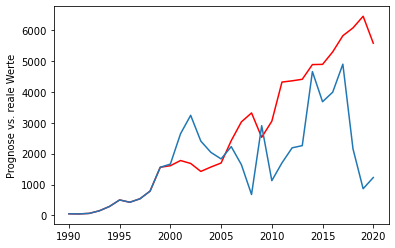

In [27]:
import matplotlib.pyplot as plt
plt.plot(df.jahr,yPrediction,'r')
plt.plot(df.jahr,Y)
plt.ylabel('Prognose vs. reale Werte')
plt.show()

In [28]:
df["Vorhersage"] = yPrediction

In [29]:
df.to_csv('data/ResultData_wind00.csv', index = False, header=True)